In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Load Dataset
credit = pd.read_csv('/Users/don/Downloads/credit_record.csv')
application = pd.read_csv('/Users/don/Downloads/application_record.csv')

In [191]:
# merge dataset by client ID
credit_app = pd.merge(credit, application, on='ID')

#print(credit_app.head())


In [192]:
'''
INITIAL EXPLORATORY TASKS:
Display representative portions of the data
'''

'\nINITIAL EXPLORATORY TASKS:\nDisplay representative portions of the data\n'

In [193]:
print(credit_app.head())
#print(credit_app.tail())

        ID  MONTHS_BALANCE STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  5008804               0      C           M            Y               Y   
1  5008804              -1      C           M            Y               Y   
2  5008804              -2      C           M            Y               Y   
3  5008804              -3      C           M            Y               Y   
4  5008804              -4      C           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             0          427500.0          Working    Higher education   
1             0          427500.0          Working    Higher education   
2             0          427500.0          Working    Higher education   
3             0          427500.0          Working    Higher education   
4             0          427500.0          Working    Higher education   

  NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0    

In [194]:
(credit_app.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [195]:
(credit_app.describe())

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837
std,4.180442e+04,14.082208,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115551e+06,-8.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [196]:
credit_app.shape

(777715, 20)

In [197]:
'''Check for missing values and clean the data'''

'Check for missing values and clean the data'

In [198]:
credit_app.isnull().sum()

ID                          0
MONTHS_BALANCE              0
STATUS                      0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
dtype: int64

In [199]:
# dropping occupation type which contains 240048 null values
credit_app.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [200]:
# Checking duplicates in 'ID' column
num_duplicates = len(credit_app['ID']) - len(credit_app['ID'].unique())
print("Number of duplicate IDs in credit_app:", num_duplicates)

Number of duplicate IDs in credit_app: 741258


In [201]:
# Dropping duplicate entries from ID column
credit_app = credit_app.drop_duplicates('ID', keep='last') 

In [202]:
# Checking Non-Numerical Columns
cat_columns = credit_app.columns[(credit_app.dtypes =='object').values].tolist()
cat_columns

['STATUS',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [203]:
# Checking Numerical Columns
credit_app.columns[(credit_app.dtypes !='object').values].tolist()

['ID',
 'MONTHS_BALANCE',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [204]:
# Checking unique values from Categorical Columns
for i in credit_app.columns[(credit_app.dtypes =='object').values].tolist():
    print(i,'\n')
    print(credit_app[i].value_counts())
    print('-----------------------------------------------')

STATUS 

0    21555
X    14591
C      302
1        8
5        1
Name: STATUS, dtype: int64
-----------------------------------------------
CODE_GENDER 

F    24430
M    12027
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype

In [205]:
# Checking unique values from Numerical Columns

In [206]:
print(credit_app['CNT_CHILDREN'].value_counts())

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64


In [207]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', credit_app['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', credit_app['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25152 
Max DAYS_BIRTH : -7489


In [208]:
# Converting 'DAYS_BIRTH' values from Day to Years
credit_app['DAYS_BIRTH'] = round(credit_app['DAYS_BIRTH']/-365,0)
credit_app.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [209]:
# Checking unique values greater than 0
credit_app[credit_app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243])

In [210]:
# If 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
credit_app['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [211]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
credit_app['DAYS_EMPLOYED'] = abs(round(credit_app['DAYS_EMPLOYED']/-365,0))
credit_app.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True) 

In [212]:
credit_app['FLAG_MOBIL'].value_counts()

1    36457
Name: FLAG_MOBIL, dtype: int64

In [213]:
# All the values in 'FLAG_MOBIL" column are 1, hence dropping column
credit_app.drop('FLAG_MOBIL', axis=1, inplace=True)

In [214]:
credit_app['FLAG_WORK_PHONE'].value_counts()

0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64

In [215]:
# drop "FLAG_WORK_PHONE"
credit_app.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [216]:
credit_app['FLAG_PHONE'].value_counts()

0    25709
1    10748
Name: FLAG_PHONE, dtype: int64

In [217]:
# drop "FLAG_PHONE"
credit_app.drop('FLAG_PHONE', axis=1, inplace=True)

In [218]:
credit_app['FLAG_EMAIL'].value_counts()

0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64

In [219]:
credit_app.drop('FLAG_EMAIL', axis=1, inplace=True)

In [220]:
credit_app['CNT_FAM_MEMBERS'].value_counts()

2.0     19463
1.0      6987
3.0      6421
4.0      3106
5.0       397
6.0        58
7.0        19
15.0        3
9.0         2
20.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [221]:
credit_app.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
15,5008804,-15,X,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
30,5008805,-14,X,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
60,5008806,-29,X,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
65,5008808,-4,X,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
70,5008809,-26,X,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [222]:
'''
Check for outliers and decide if and how to process them.
'''

'\nCheck for outliers and decide if and how to process them.\n'

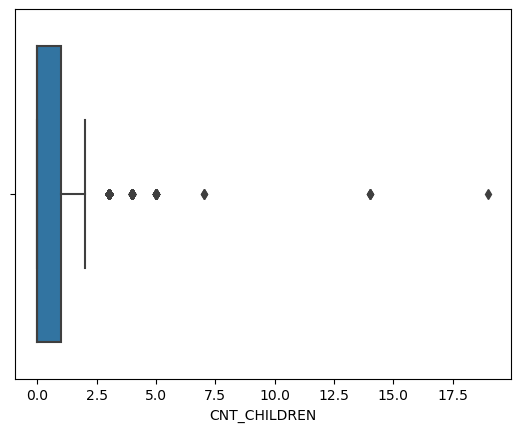

In [223]:
sns.boxplot(x=credit_app['CNT_CHILDREN'])
plt.show()

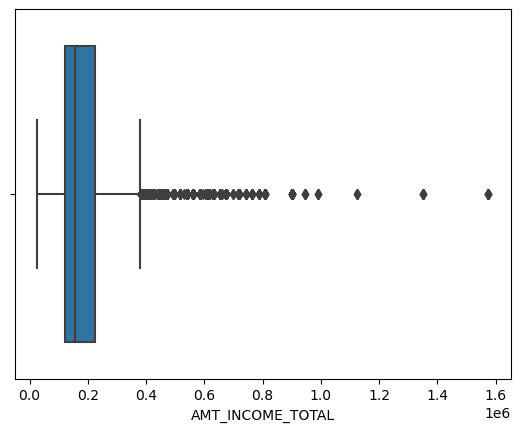

In [224]:
# Create boxplot for 'AMT_INCOME_TOTAL'
sns.boxplot(x=credit_app['AMT_INCOME_TOTAL'])
plt.show()

<Axes: xlabel='AGE_YEARS'>

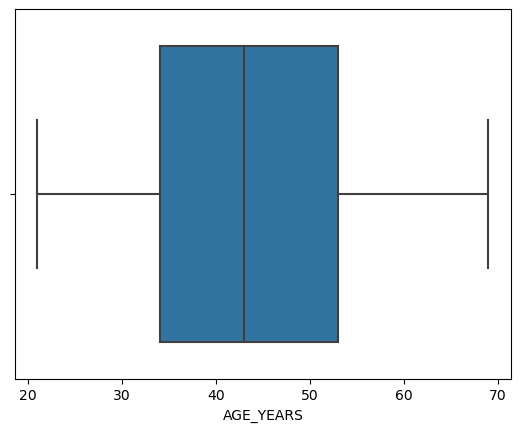

In [225]:
sns.boxplot(x=credit_app['AGE_YEARS'])

<Axes: xlabel='YEARS_EMPLOYED'>

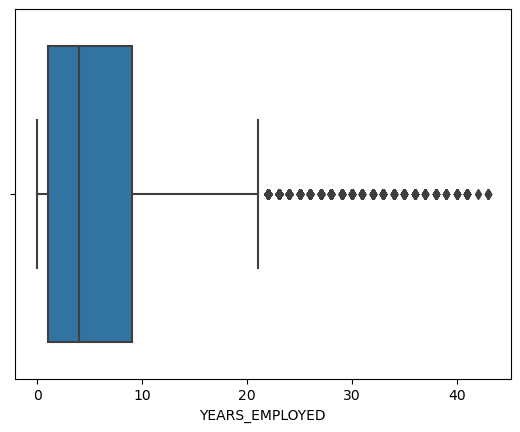

In [226]:
sns.boxplot(x=credit_app['YEARS_EMPLOYED'])

<Axes: xlabel='CNT_FAM_MEMBERS'>

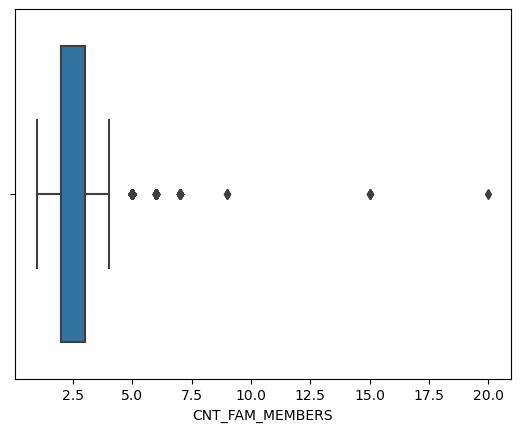

In [227]:
sns.boxplot(x=credit_app['CNT_FAM_MEMBERS'])

In [228]:
# Removing Outliers


In [229]:
high_bound = credit_app['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = credit_app['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [230]:
credit_app = credit_app[(credit_app['CNT_CHILDREN']>=low_bound) & (credit_app['CNT_CHILDREN']<=high_bound)]

In [231]:
high_bound = credit_app['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 900000.0
low_bound : 40500.0


In [232]:
credit_app = credit_app[(credit_app['AMT_INCOME_TOTAL']>=low_bound) & (credit_app['AMT_INCOME_TOTAL']<=high_bound)]

In [233]:
high_bound = credit_app['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = credit_app['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 41.0
low_bound : 0.0


In [234]:
app_df = credit_app[(credit_app['YEARS_EMPLOYED']>=low_bound) & (credit_app['YEARS_EMPLOYED']<=high_bound)]

In [235]:
high_bound = credit_app['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = credit_app['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [236]:
credit_app = credit_app[(credit_app['CNT_FAM_MEMBERS']>=low_bound) & (credit_app['CNT_FAM_MEMBERS']<=high_bound)]

In [237]:
credit_app['STATUS'].value_counts()

0    21486
X    14531
C      302
1        8
5        1
Name: STATUS, dtype: int64

In [238]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
credit_app['STATUS'].replace(['C', 'X'],0, inplace=True)

In [239]:
credit_app['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [240]:
credit_app['STATUS'] = credit_app['STATUS'].astype('int')

In [241]:
credit_app['STATUS'].value_counts(normalize=True)*100

0    99.975226
1     0.024774
Name: STATUS, dtype: float64

In [242]:
credit_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36328 entries, 15 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36328 non-null  int64  
 1   MONTHS_BALANCE       36328 non-null  int64  
 2   STATUS               36328 non-null  int64  
 3   CODE_GENDER          36328 non-null  object 
 4   FLAG_OWN_CAR         36328 non-null  object 
 5   FLAG_OWN_REALTY      36328 non-null  object 
 6   CNT_CHILDREN         36328 non-null  int64  
 7   AMT_INCOME_TOTAL     36328 non-null  float64
 8   NAME_INCOME_TYPE     36328 non-null  object 
 9   NAME_EDUCATION_TYPE  36328 non-null  object 
 10  NAME_FAMILY_STATUS   36328 non-null  object 
 11  NAME_HOUSING_TYPE    36328 non-null  object 
 12  AGE_YEARS            36328 non-null  float64
 13  YEARS_EMPLOYED       36328 non-null  float64
 14  CNT_FAM_MEMBERS      36328 non-null  float64
dtypes: float64(4), int64(4), object(7)

In [243]:
credit_df_trans = credit_app.groupby('ID').agg(max).reset_index()

In [244]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [245]:
credit_app.shape

(36328, 15)

In [246]:
credit_app.drop('ID', axis=1, inplace=True)

In [247]:
# checking if there are still duplicate rows in credit_app Dataframe
len(credit_app) - len(credit_app.drop_duplicates())

4401

In [248]:
# Dropping duplicate records
credit_app = credit_app.drop_duplicates()
credit_app.reset_index(drop=True ,inplace=True)

In [249]:
credit_app.shape

(31927, 14)

In [250]:
credit_app['STATUS'].value_counts(normalize=True)*100

0    99.971811
1     0.028189
Name: STATUS, dtype: float64

In [251]:
'''
Formally state what your model will predict using the variables in the data.

The logistic regression model will predict binary loan approval outcomes (approved or not approved) from a bank loan application dataset.
'''

'\nFormally state what your model will predict using the variables in the data.\n\nThe logistic regression model will predict binary loan approval outcomes (approved or not approved) from a bank loan application dataset.\n'

In [252]:
#EDA PLOTS

/var/folders/87/282ht65d4m13tkmwtmpv92mw0000gn/T/ipykernel_12490/4171035595.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_app.corr(), annot=True)


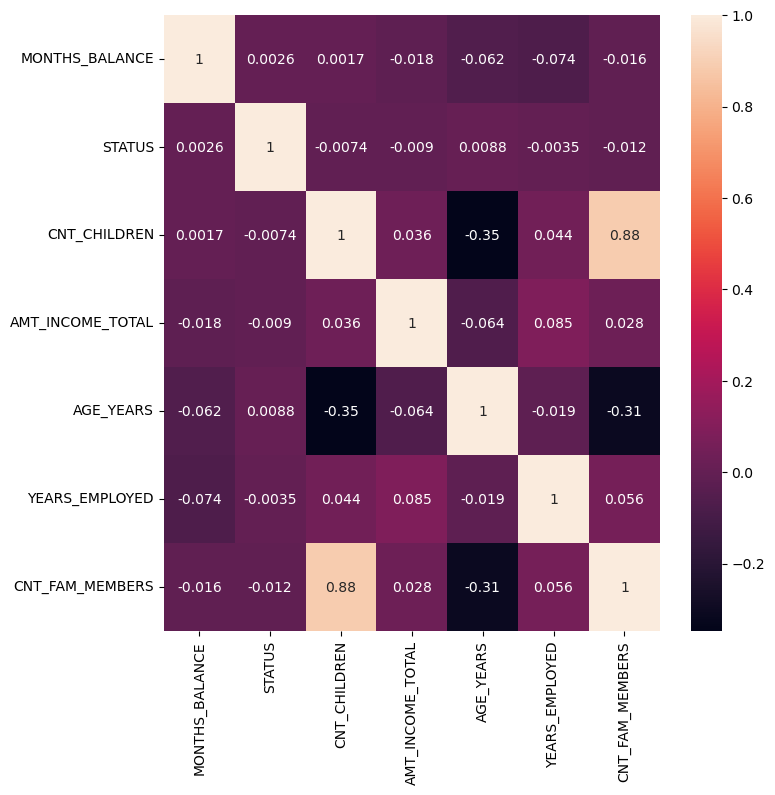

In [253]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(credit_app.corr(), annot=True)
plt.show()

In [254]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        credit_app[col] = globals()['LE_{}'.format(col)].fit_transform(credit_app[col])
credit_app.head()  

,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,-15,0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,-14,0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
2,-29,0,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
3,-4,0,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
4,-26,0,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0


In [255]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

STATUS   :  [0 1]
CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [262]:
credit_app.corr()

,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
MONTHS_BALANCE,1.000000,0.002558,0.007325,-0.026435,0.004998,0.001694,-0.018407,0.001898,0.013714,0.026744,0.033605,-0.061660,-0.073505,-0.016014
STATUS,0.002558,1.000000,-0.007859,-0.009288,0.007794,-0.007416,-0.009010,-0.007075,0.002944,0.016924,-0.005015,0.008797,-0.003540,-0.012023
CODE_GENDER,0.007325,-0.007859,1.000000,0.362580,-0.051473,0.078180,0.207200,0.104815,0.007200,-0.098072,0.069138,-0.201479,-0.033693,0.110994
FLAG_OWN_CAR,-0.026435,-0.009288,0.362580,1.000000,-0.012752,0.105767,0.219432,0.053429,-0.100363,-0.124753,0.015878,-0.155089,0.005502,0.152973
FLAG_OWN_REALTY,0.004998,0.007794,-0.051473,-0.012752,1.000000,-0.002682,0.034997,-0.045941,0.008259,0.017891,-0.184853,0.132111,-0.028975,-0.005295
CNT_CHILDREN,0.001694,-0.007416,0.078180,0.105767,-0.002682,1.000000,0.035760,0.105797,-0.049518,-0.168312,0.029929,-0.347738,0.044220,0.884287
AMT_INCOME_TOTAL,-0.018407,-0.009010,0.207200,0.219432,0.034997,0.035760,1.000000,-0.072981,-0.230373,-0.008781,-0.011804,-0.064294,0.085354,0.028274
NAME_INCOME_TYPE,0.001898,-0.007075,0.104815,0.053429,-0.045941,0.105797,-0.072981,1.000000,0.058736,-0.046035,0.039322,-0.211134,0.190017,0.104409
NAME_EDUCATION_TYPE,0.013714,0.002944,0.007200,-0.100363,0.008259,-0.049518,-0.230373,0.058736,1.000000,0.006716,-0.037303,0.166401,-0.017120,-0.039764
NAME_FAMILY_STATUS,0.026744,0.016924,-0.098072,-0.124753,0.017891,-0.168312,-0.008781,-0.046035,0.006716,1.000000,0.009830,0.108730,-0.050793,-0.559811


In [263]:
features = credit_app.drop(['STATUS'], axis=1)
label = credit_app['STATUS']

In [264]:
features.head()

,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,-15,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,-14,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
2,-29,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
3,-4,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
4,-26,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0


In [265]:
#split data into 70% training set and use % 30 testing set for predictions.
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.3,  # 30% for the testing set
                                                    random_state=10)


In [266]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  99.98956049692035 %

Confusion matrix :
[[9578    0]
 [   1    0]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9578
           1       0.00      0.00      0.00         1

    accuracy                           1.00      9579
   macro avg       0.50      0.50      0.50      9579
weighted avg       1.00      1.00      1.00      9579



/Users/don/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/don/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/don/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
Make Predictions:
Demonstrate a few examples of predictions your model can make.

SyntaxError: invalid syntax (2987555396.py, line 1)